In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import plotly.express as px
from tabulate import tabulate
from IPython.display import display



# Set the style for seaborn plots
sns.set(style="whitegrid")

In [2]:
df = pd.read_excel('Marketing_campaign.xlsx')
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Parent?,Dt_Customer,Month Joined,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Accepted or Not,Complain,Z_CostContact,Z_Revenue,Response
0,6019,1971,PhD,Married,37126.0,1,0,1,30-03-2014,3,...,1,0,0,0,0,1,0,3,11,1
1,10972,1949,Graduation,Widow,72298.0,0,0,0,10-03-2014,3,...,0,1,1,0,0,1,0,3,11,0
2,2909,1974,PhD,Married,78128.0,0,1,1,19-02-2014,2,...,0,1,1,0,0,1,0,3,11,0
3,10129,1966,Graduation,Together,82427.0,0,0,0,12-03-2014,3,...,0,0,1,0,0,1,0,3,11,0
4,8318,1979,Graduation,Together,90300.0,0,0,0,03-01-2014,1,...,0,0,1,0,0,1,0,3,11,0


In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Parent?              2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Month Joined         2240 non-null   int64  
 10  Year Joined          2240 non-null   int64  
 11  Recency              2240 non-null   int64  
 12  MntWines             2240 non-null   int64  
 13  MntFruits            2240 non-null   int64  
 14  MntMeatProducts      2240 non-null   int64  
 15  MntFishProducts      2240 non-null   i

In [4]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Parent?  Month Joined  Year Joined      Recency     MntWines  ...  \
count  2240.000000   2240.000000  2240.000000  2240.000000  2240.000000  ...   
mean      0.715179      6.467411  2013.028125    49.109375   303.935714  ...   
std       0.451430      3.486695     0.684554

In [5]:
# Display unique values in categorical columns excluding 'Dt_Customer'
print("\nUnique Values in Categorical Columns:")
for column in df.select_dtypes(include=['object', 'category']).columns:
    if column != 'Dt_Customer':
        print(f"{column}: {df[column].unique()}")

# Display value counts for categorical columns excluding 'Dt_Customer'
print("\nValue Counts for Categorical Columns:")
for column in df.select_dtypes(include=['object', 'category']).columns:
    if column != 'Dt_Customer':
        print(f"\n{column}:\n{df[column].value_counts()}")



Unique Values in Categorical Columns:
Education: ['PhD' 'Graduation' 'Master' '2n Cycle' 'Basic']
Marital_Status: ['Married' 'Widow' 'Together' 'Divorced' 'Single' 'Alone' 'Absurd' 'YOLO']

Value Counts for Categorical Columns:

Education:
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Marital_Status:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


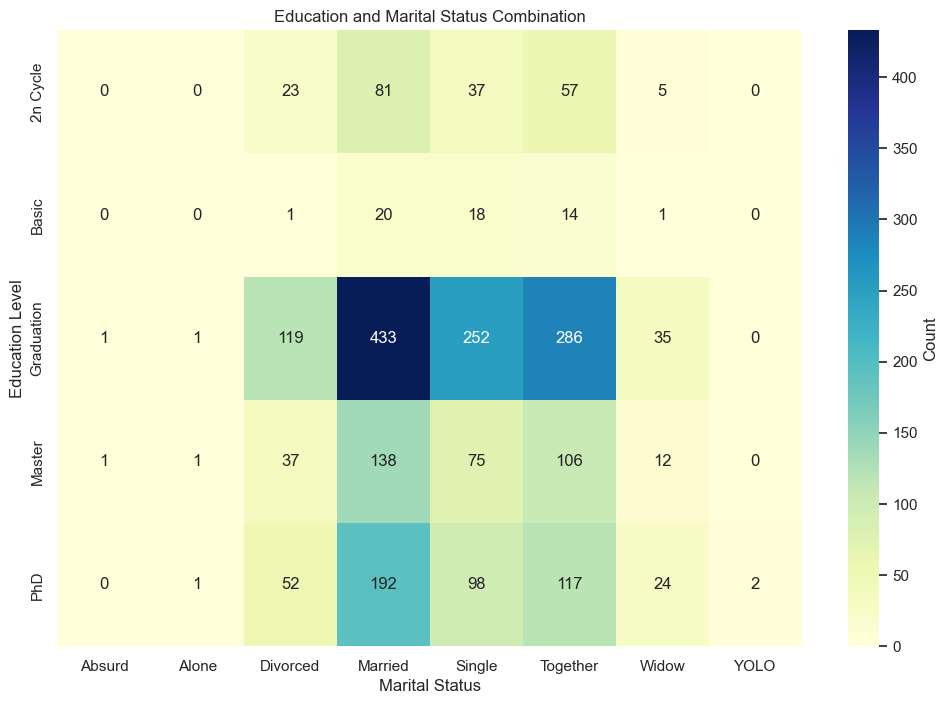

In [6]:
education_marital_counts = df.groupby(['Education', 'Marital_Status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(education_marital_counts, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Count'})
plt.title('Education and Marital Status Combination')
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.show()

In [7]:
# Calculate age as of 2014
df['Age'] = 2014 - df['Year_Birth']

# Drop the 'Year_Birth' column
df = df.drop('Year_Birth', axis=1)

# Display the updated DataFrame
print(df.head())

      ID   Education Marital_Status   Income  Kidhome  Teenhome  Parent?  \
0   6019         PhD        Married  37126.0        1         0        1   
1  10972  Graduation          Widow  72298.0        0         0        0   
2   2909         PhD        Married  78128.0        0         1        1   
3  10129  Graduation       Together  82427.0        0         0        0   
4   8318  Graduation       Together  90300.0        0         0        0   

  Dt_Customer  Month Joined  Year Joined  ...  AcceptedCmp4  AcceptedCmp5  \
0  30-03-2014             3         2014  ...             0             0   
1  10-03-2014             3         2014  ...             1             1   
2  19-02-2014             2         2014  ...             1             1   
3  12-03-2014             3         2014  ...             0             1   
4  03-01-2014             1         2014  ...             0             1   

   AcceptedCmp1  AcceptedCmp2  Accepted or Not  Complain  Z_CostContact  \
0    

In [8]:
# Filter out rows with income greater than 250,000 to filter outliers
df = df[df['Income'] <= 250000]

# Display the row count of the updated DataFrame
print("Row count after filtering:", df.shape[0])


Row count after filtering: 2215


In [9]:
# Imputing missing values in Income based on mean value, as any variable related to income was not highly correlated
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Nulls after imputing
print(df.isnull().sum())


ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Parent?                0
Dt_Customer            0
Month Joined           0
Year Joined            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Accepted or Not        0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64


In [10]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '101-120']

# Create a new column 'AgeGroup' with the age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Check the frequency of each age group
age_group_freq = df['AgeGroup'].value_counts().sort_index()

# Display the frequency of each age group
print(age_group_freq)


0-20         7
21-30      212
31-40      552
41-50      669
51-60      459
61-70      298
71-80       15
81-90        0
91-100       0
101-120      2
Name: AgeGroup, dtype: int64


In [11]:
# Calculating Frequency, Assuming each time they visited the store they made a purchase
df["Frequency"]=df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

In [12]:
# Calculating Monetary (Total spent) as the sum of amount spent on all products
df["Monetary"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [13]:
# Select the desired columns
selected_columns = ['ID', 'Frequency', 'Recency', 'Monetary']

# Create a new DataFrame with only the selected columns
df_selected = df[selected_columns].copy()

# Convert categorical columns to numerical values
#for column in ['Education']:
#    df_selected[column] = df_selected[column].astype('category').cat.codes

In [14]:
print(df_selected.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         2215 non-null   int64
 1   Frequency  2215 non-null   int64
 2   Recency    2215 non-null   int64
 3   Monetary   2215 non-null   int64
dtypes: int64(4)
memory usage: 86.5 KB
None


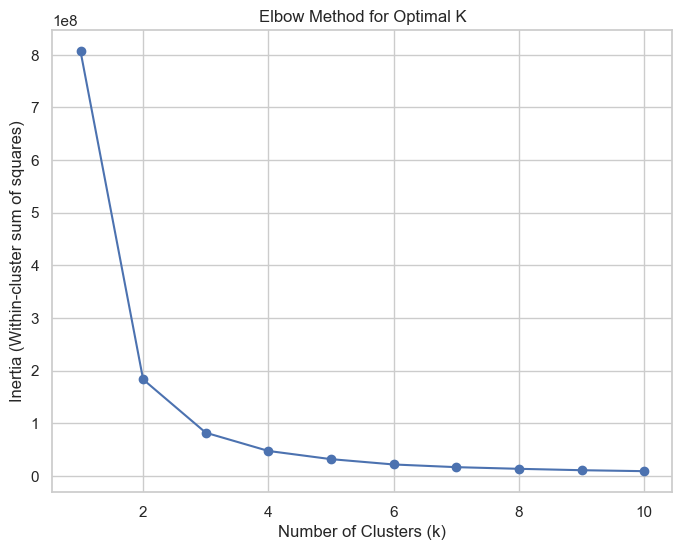

In [15]:
# Extract features for clustering
X = df_selected.drop(['ID'], axis=1)  # Assuming 'ID' should not be used for clustering

# Initialize an empty list to store inertia values
inertia_values = []

# Define a range of k values to test
k_values = range(1, 11)

# Perform k-means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.show()

# Below Plot suggests ideal K for clustering is 3

In [16]:
optimal_k = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, n_init=50, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(X)

In [17]:
# Display the clustered data
print(df_selected[['ID', 'Cluster']])


         ID  Cluster
0      6019        0
1     10972        2
2      2909        2
3     10129        1
4      8318        1
...     ...      ...
2235    624        0
2236  10913        0
2237  10872        2
2238   7476        2
2239   7381        1

[2215 rows x 2 columns]


In [18]:
# RMF Metric (Recency, Frequency, Monetary): is a customer segmentation and analysis method used in marketing and customer relationship management.

# RFM SCORES
def get_rfm_scores(dataframe):
    dataframe["R"] = pd.qcut(dataframe["Recency"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["F"] = pd.qcut(dataframe["Frequency"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["M"] = pd.qcut(dataframe["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["RFM_SCORE"] = dataframe["R"].astype(str) + dataframe["F"].astype(str) + dataframe["M"].astype(str)
    return dataframe

# Assuming df_selected is the name of your DataFrame
df_selected = get_rfm_scores(df_selected)

# Segmentation map in business terms
seg_map = {
    '111': 'VIP Customers - Highly valuable, frequent, and big spenders',
    '555': 'Low Value Customers - Least valuable, infrequent, and low spenders',
    '211': 'Medium Value Customers - Moderately valuable with high recency',
    '444': 'Balanced Value Customers - Moderate in recency, frequency, and monetary',
    '533': 'Potential High Value Customers - Moderate recency, frequent, and high spenders',
    '322': 'Frequent but Low Value Customers - High recency, frequent, but low spenders',
    '244': 'High Frequency but Low Spend Customers - Moderate recency, high frequency, but low spenders',
    '155': 'Low Frequency but High Spend Customers - Low recency, infrequent, but high spenders',
    '135': 'Promising Customers - High recency, moderate frequency, and low spenders',
    '525': 'Champion Customers - Low recency, frequent, and high spenders',
    '511': 'New Customers - Low recency, frequent, and low spenders',
    '311': 'Potential Promising Customers - Moderate recency, frequent, and low spenders',
    # Add more segments as needed based on your business criteria
}

# Assign labels based on the segmentation map
df_selected['Segment'] = df_selected['RFM_SCORE'].replace(seg_map, regex=True)

# Reset index (optional, depending on your requirements)
df_selected = df_selected.reset_index()

# Display the updated DataFrame
print(df_selected[['ID', 'Segment']])


         ID                                            Segment
0      6019                                                512
1     10972                                                334
2      2909                                                145
3     10129                                                445
4      8318                                                545
...     ...                                                ...
2210    624  New Customers - Low recency, frequent, and low...
2211  10913  Potential Promising Customers - Moderate recen...
2212  10872                                                245
2213   7476  Low Frequency but High Spend Customers - Low r...
2214   7381  Low Value Customers - Least valuable, infreque...

[2215 rows x 2 columns]


In [43]:
# Customer profiling
for cluster_num in range(optimal_k):
    cluster_data = df_selected[df_selected['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num} Profile:")
    print(cluster_data.describe(include='all'))



Cluster 0 Profile:
              index            ID    Frequency      Recency     Monetary  \
count   1255.000000   1255.000000  1255.000000  1255.000000  1255.000000   
unique          NaN           NaN          NaN          NaN          NaN   
top             NaN           NaN          NaN          NaN          NaN   
freq            NaN           NaN          NaN          NaN          NaN   
mean     985.121912   5599.932271     9.597610    48.649402   152.758566   
std      630.518791   3272.007721     4.809596    29.087940   146.273034   
min        0.000000      9.000000     0.000000     0.000000     5.000000   
25%      460.500000   2788.500000     6.000000    24.000000    44.000000   
50%      906.000000   5513.000000     8.000000    49.000000    81.000000   
75%     1561.500000   8392.000000    12.000000    74.000000   241.500000   
max     2236.000000  11191.000000    27.000000    99.000000   535.000000   

        Cluster       R       F       M RFM_SCORE Segment  
count  

In [19]:
centroids = kmeans.cluster_centers_

# Display the centroid values
print("Centroid Values:")
print(centroids)


Centroid Values:
[[   9.59760956   48.64940239  152.75856574]
 [  21.66666667   50.72222222 1669.43888889]
 [  21.86666667   48.79        920.845     ]]


In [22]:
# Drop specified columns from df before appending the resulting columns from clustering 
columns_to_drop = ['Recency', 'Frequency', 'Monetary']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [23]:
# Merge the DataFrames based on the 'Id' column using outer join
merged_df = pd.merge(df, df_selected, on='ID', how='outer')

# Export the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)